# Obtaining the optimal photometry mask for PLATO

## Fernando GUTIERREZ-CANALES
### LESIA-PARIS OBSERVATORY
#### March 2022

In [1]:
# First, let's import the main libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## First we have to obtaing the flux per pixel of the imagette and then multiply it by the flux from [Marchitori et al. (2019)](https://www.aanda.org/articles/aa/pdf/2019/07/aa35269-19.pdf) and by the integration time, 21 seconds, obtaining a flux per pixel. This flux is obtained according to the magnitude of the star. We focus on two posibilites.

## If the star has P = 11.16, the flux per pixel is the following 

In [17]:
f = (0.80711632, 4.15338249, 29.8625558, 34.10638188, 25.5706307, 0.62880493, 2.42006388e+00, 1.85694031e+02, 1.79914218e+03, 2.89522442e+03, 8.24834778e+02, 4.24798011e+01, 1.55650535e+01, 1.88778093e+02, 2.48015866e+04, 1.90720872e+04, 2.10655194e+03, 3.89391773e+01, 1.11396023e+01, 5.34077018e+01, 4.05639842e+04, 2.56696132e+04, 1.42515080e+03, 2.48822550e+01, 7.24122555 , 56.84121451, 158.84056978, 68.54457899, 65.4001885, 4.09287484, 12.26166337, 11.36452866, 6.03981203, 4.61641314, 8.72138443, 0.07578957)

## If the star has a P = 10.66, the flux per pixel is the following

In [18]:
f = (1.35857865e+00, 6.99118161e+00, 5.02661509e+01, 5.74095717e+01, 4.30417674e+01, 1.05843598e+00, 4.07357284e+00, 3.12569502e+02, 3.02840631e+03, 4.87338688e+03, 1.38840325e+03, 7.15041307e+01, 2.61998783e+01, 3.17760750e+02, 4.17472739e+04, 3.21030932e+04, 3.54585383e+03, 6.55443753e+01, 1.87507370e+01, 8.98985209e+01, 6.82793317e+04, 4.32083797e+04, 2.39888526e+03, 4.18830590e+01, 1.21887938e+01, 9.56779816e+01, 2.67368410e+02, 1.15377671e+02, 1.10084876e+02, 6.88933210e+00, 2.06394464e+01, 1.91293443e+01, 1.01665144e+01, 7.77057800e+00, 1.46802715e+01, 1.27572799e-01)

In [34]:
f2 = [i * 24 for i in f]

In [35]:
f2

[32.6058876,
 167.78835864,
 1206.3876215999999,
 1377.8297208,
 1033.0024176,
 25.40246352,
 97.76574815999999,
 7501.6680479999995,
 72681.75144,
 116961.28512,
 33321.678,
 1716.0991368,
 628.7970792000001,
 7626.258,
 1001934.5736,
 770474.2368,
 85100.49192,
 1573.0650071999999,
 450.017688,
 2157.5645016,
 1638703.9608,
 1037001.1128,
 57573.24624,
 1005.1934160000001,
 292.5310512,
 2296.2715584,
 6416.841839999999,
 2769.064104,
 2642.0370239999997,
 165.3439704,
 495.34671360000004,
 459.1042632,
 243.9963456,
 186.493872,
 352.32651599999997,
 3.061747176]

## Now we put that as a numpy array

In [36]:
F = np.array(f2)

In [37]:
len(F)

36

## Now I have to obtain the NSRn and arrange all pixels 'n' from the target imagette in increasing order of $NSR_{n}$. The mathematical expression for the $NSR$ is the following:

$NSR_{n} = \frac{\sqrt{\sigma^{2}_{F_{T_{n}}} + \sum_{k = 1}^{N_{c}} \sigma^{2}_{F_{C_{n,k}}} + \sigma^{2}_{B_{n}} + \sigma^{2}_{D_{n}} + \sigma^{2}_{Q_{n}}} }{F_{T_{n}}}$

## For the sake of clarity, let's asume that there are zero contaminant stars. Therefore, $\sigma^{2}_{F_{C_{n,k}}} = 0$. Also, 

1. n = 36
2. $\sigma^{2}_{B}= 45 e^{-} px ^{-1} s^{-1}$
3. $\sigma^{2}_{Q} = 7.2 e^{-} rms px^{-1}$ 
4. $ \sigma^{2}_{D} = 50.2 e^{-} px^{-} s^{-1}$
5. $\sigma^{2}_{F_{T_{n}}} = F_{T_{n}}$

## As can be seen, $\sigma^{2}_{F_{T_{n}}} = F_{T_{n}}$, this is due to the fact that the photometric noise follows a  Poisson distribution. 

## Let's compute the NSRn

In [38]:
sb = 45
sq = 7.2
sd = 50.2

sigmas = sb**2 + sq**2 + sd**2
N = []

for i in range(0,36):
    N.append(np.sqrt(sigmas + F[i])/F[i])

In [39]:
N = np.array(N)

In [40]:
N

array([2.08674968e+00, 4.11390741e-01, 6.31465208e-02, 5.60999994e-02,
       7.26353986e-02, 2.67640852e+00, 7.00833229e-01, 1.46625256e-02,
       3.82476122e-03, 2.98091736e-03, 5.84384978e-03, 4.62993404e-02,
       1.14963710e-01, 1.44970576e-02, 1.00132328e-03, 1.14264850e-03,
       3.51931215e-03, 4.99337263e-02, 1.57863841e-01, 3.80917592e-02,
       7.82272450e-04, 9.84171637e-04, 4.33082023e-03, 7.44602968e-02,
       2.39032142e-01, 3.61564403e-02, 1.63548180e-02, 3.09942548e-02,
       3.22031163e-02, 4.17365499e-01, 1.44060388e-01, 1.54878642e-01,
       2.85153478e-01, 3.70853684e-01, 1.99674432e-01, 2.21516887e+01])

## Now we can arrange the elements in increasing order of $NSR_{n}$.

In [41]:
NSR = np.sort(N)

In [42]:
NSR

array([7.82272450e-04, 9.84171637e-04, 1.00132328e-03, 1.14264850e-03,
       2.98091736e-03, 3.51931215e-03, 3.82476122e-03, 4.33082023e-03,
       5.84384978e-03, 1.44970576e-02, 1.46625256e-02, 1.63548180e-02,
       3.09942548e-02, 3.22031163e-02, 3.61564403e-02, 3.80917592e-02,
       4.62993404e-02, 4.99337263e-02, 5.60999994e-02, 6.31465208e-02,
       7.26353986e-02, 7.44602968e-02, 1.14963710e-01, 1.44060388e-01,
       1.54878642e-01, 1.57863841e-01, 1.99674432e-01, 2.39032142e-01,
       2.85153478e-01, 3.70853684e-01, 4.11390741e-01, 4.17365499e-01,
       7.00833229e-01, 2.08674968e+00, 2.67640852e+00, 2.21516887e+01])

## The following plot shows this increasing behaviour.

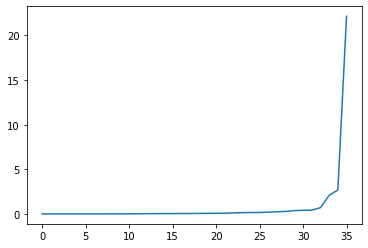

In [43]:
plt.plot(NSR)

## Now, here comes something more or less delicate. Since the value of $NSR$ becomes minimum when $F_{T}$ is maximum, a decreasing sorting of $F_{T}$ corresponds to an increasing sorting of $NSR$. That is, we sort the array in decreasing order because that will create a $NSR$ in increasing order.

In [44]:
F[::-1].sort()

In [45]:
F

array([1.63870396e+06, 1.03700111e+06, 1.00193457e+06, 7.70474237e+05,
       1.16961285e+05, 8.51004919e+04, 7.26817514e+04, 5.75732462e+04,
       3.33216780e+04, 7.62625800e+03, 7.50166805e+03, 6.41684184e+03,
       2.76906410e+03, 2.64203702e+03, 2.29627156e+03, 2.15756450e+03,
       1.71609914e+03, 1.57306501e+03, 1.37782972e+03, 1.20638762e+03,
       1.03300242e+03, 1.00519342e+03, 6.28797079e+02, 4.95346714e+02,
       4.59104263e+02, 4.50017688e+02, 3.52326516e+02, 2.92531051e+02,
       2.43996346e+02, 1.86493872e+02, 1.67788359e+02, 1.65343970e+02,
       9.77657482e+01, 3.26058876e+01, 2.54024635e+01, 3.06174718e+00])

## Now, we have to calculate the aggregate noise-to-signal ratio, $NSR_{agg}(m)$, as a function of the increasing number of pixels $m = {1,2,3,\dots,36}$ by stacking them to conform to the arrangement in the previous step and starting with the pixel owing the smallest $NSR_{n}$

$NSR_{agg}(m) = \frac{\sqrt{\sum_{n = 1}^{m} \left( \sigma^{2}_{F_{T_{n}}} + \sum_{k = 1}^{N_{C}} \sigma_{F_{C_{n,k}}}  + \sigma^{2}_{B_{n}} + \sigma^{2}_{D_{n}} + \sigma^{2}_{Q_{n}} \right)}}{\sum_{n = 1}^{m} F_{T_{n}}}$

## Now we have to start the count with the lowest pixel value of $NSR$ to start the summatory in both numerator and denominator. Let's start programming the denominator first

In [46]:
# Let's initialize the array. It will have as first element the first element of the flux array
b = [F[0]]
c = F[0]
for i in range(1,len(F)):
    c = c + F[i]
    b.append(c)

## If we print the array, the elements will be sorted in increasing order, exactly as we wanted

In [47]:
b

[1638703.9608,
 2675705.0736,
 3677639.6471999995,
 4448113.884,
 4565075.16912,
 4650175.66104,
 4722857.4124799995,
 4780430.65872,
 4813752.33672,
 4821378.59472,
 4828880.262768,
 4835297.104608,
 4838066.168712,
 4840708.205736,
 4843004.4772944,
 4845162.041796001,
 4846878.1409328,
 4848451.205940001,
 4849829.0356608005,
 4851035.423282401,
 4852068.4257000005,
 4853073.619116001,
 4853702.416195201,
 4854197.7629088005,
 4854656.867172001,
 4855106.884860001,
 4855459.211376,
 4855751.7424272,
 4855995.7387728,
 4856182.2326448,
 4856350.02100344,
 4856515.36497384,
 4856613.130722,
 4856645.7366096005,
 4856671.13907312,
 4856674.200820296]

In [48]:
#np.sum(F)

## Now, let's program the numerator of the function

In [49]:
# Let's initialize the sumatory
d = []
c = 0
for i in range(0,36):
    c = c + sigmas + F[i]
    d.append(c)

## And we can print it now

In [50]:
d

[1643300.8408,
 2684898.8335999995,
 3691430.287199999,
 4466501.403999999,
 4588059.569119999,
 4677756.941039999,
 4755035.572479999,
 4817205.698719999,
 4855124.256719999,
 4867347.394719999,
 4879445.942767999,
 4890459.664607999,
 4897825.608711999,
 4905064.5257359985,
 4911957.677294399,
 4918712.121795999,
 4925025.100932798,
 4931195.045939999,
 4937169.755660798,
 4942973.0232823985,
 4948602.905699998,
 4954204.979115998,
 4959430.656195198,
 4964522.882908798,
 4969578.867171998,
 4974625.764859998,
 4979574.971375997,
 4984464.382427197,
 4989305.258772797,
 4994088.632644797,
 4998853.301003437,
 5003615.524973837,
 5008310.170721997,
 5012939.656609597,
 5017561.9390731165,
 5022161.880820292]

In [51]:
#F[::-1].sort()

## Now we convert those into arrays of numpy

In [52]:
c = np.array(c)
d = np.array(np.sqrt(d))

## Now we can define our aperture plot

In [53]:
# Now we define our plot

z = 10**6/(12*np.sqrt(24))

In [54]:
NSR1h = z*(d/b)

## And now we can plot the Number of pixels vs $NSR$ in order to know the optimal aperture for PLATO photometry to sample P5

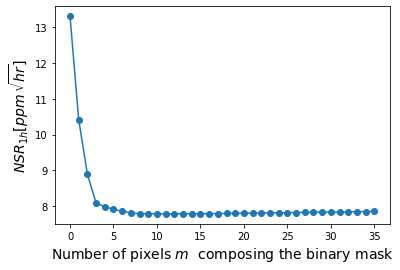

In [55]:
plt.plot(NSR1h, 'o-')
plt.xlabel('Number of pixels $m$  composing the binary mask', fontsize=14)
plt.ylabel('$ NSR_{1h}[ppm \, \sqrt{hr}] $', fontsize = 14)
plt.savefig('binary_mask.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

## Now we can talk about something really cool: Sub optimal apertures. This concept refers to the fact that we can use almost-optimal apertures in PLATO in order to decrease the number of masks updates during the life time of the mision. These sub optimal masks have to give almost the same $NSR_{1h}$ than the optimal ones. In fact, a diference of $\sim 1 \%$ will be enough. Here we add some lines to indicate the optimal (red crossline) and sub-optimal (green crossline) masks

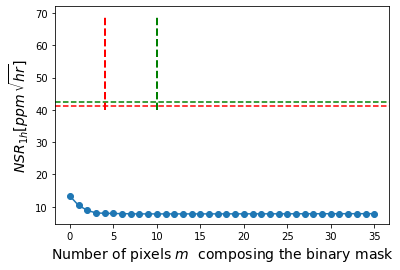

In [56]:
plt.plot(NSR1h, 'o-')
plt.axhline(y = 41.2, color = 'r', linestyle = '--')
plt.axhline(y=42.4, color = 'g', linestyle = '--')
plt.vlines(x=4, ymin=40, ymax=69, colors='red', ls='--', lw=2)
plt.vlines(x=10, ymin=40, ymax=69, colors='green', ls='--', lw=2)
plt.xlabel('Number of pixels $m$  composing the binary mask', fontsize=14)
plt.ylabel('$ NSR_{1h}[ppm \, \sqrt{hr}] $', fontsize = 14)
plt.savefig('sub_optimal_mask.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

In [24]:
## Done! We did a magnificent job, didn't we? We should be proud of ourselves! Let's be happy for a moment. 

## Now it is time to add some contaminant stars! That is the funny part, right? First of all, we have to remember how to get the flux from the contaminant

$ f_{c} = f_{t} \times 10^{-0.4 \Delta m}$

## where

$\Delta m = m_{c} - m_{T}$

## where $m_{c}$ stands for the magnitude of the contaminant and $m_{T}$ stands for the magnitude of the target. Of course, the contaminants are fainter than the targets. So $m_{c} > m_{T}$. But let's put some numbers:

$m_{T} = 10.66$ 

## and
$m_{c} = 32$

In [25]:
f = F*10**(-0.4*(12-10.66))

In [26]:
f

array([1.98741820e+04, 1.25767370e+04, 1.21514505e+04, 9.34430229e+03,
       1.41850506e+03, 1.03209774e+03, 8.81483409e+02, 6.98247639e+02,
       4.04124911e+02, 9.24911654e+01, 9.09801400e+01, 7.78233808e+01,
       3.35831762e+01, 3.20425933e+01, 2.78491539e+01, 2.61669164e+01,
       2.08128297e+01, 1.90781135e+01, 1.67103023e+01, 1.46310546e+01,
       1.25282409e+01, 1.21909737e+01, 7.62604343e+00, 6.00755899e+00,
       5.56801099e+00, 5.45780912e+00, 4.27301176e+00, 3.54781308e+00,
       2.95918475e+00, 2.26179544e+00, 2.03493520e+00, 2.00528969e+00,
       1.18570182e+00, 3.95443813e-01, 3.08080773e-01, 3.71328330e-02])

## Of course, this is the flux of the contaminant as if it is spread in the whole imagette. The vector $f$ gives us the flux of the contaminant in each pixel of the imagette, and that is not correct since in a realistic case the fluxes from contaminant and target are mixed and diluted in one another. However, we expect to only have a contaminant flux (or an increase in a diluted flux) in very few pixels, so we have to play with the values of the vector $f$.

## Now we have the flux of the contaminant stars, so, let's see how affects our plot. Of course, we have ot move our contaminant star in the imagette, since it can be anywhere on it. This is kind of a difficult task to achieve since I don't know how to do that, but, of course, that will change the shape of our plot. However, let's think about that later and let's suppose that our contaminant is in the same place as our imagette. 

## Let's calculate the $NSR$ again, now with the contaminant of $m_{c} = 32$

In [27]:
sb = 45
sq = 7.2
sd = 50.2

sigmas = sb**2 + sq**2 + sd**2
N = []

for i in range(0,36):
    N.append(np.sqrt(sigmas + f[i] + F[i])/F[i])

In [28]:
N

[0.004460346716525478,
 0.0056870330806132316,
 0.005793399732545062,
 0.006684069273522156,
 0.02141206539838415,
 0.027013336058282586,
 0.030455672647226907,
 0.03656511798574652,
 0.05757244776831908,
 0.2226866924439524,
 0.22623357566456195,
 0.26293259734417457,
 0.5970831521352595,
 0.6253397548344606,
 0.718088090692298,
 0.7636487752910851,
 0.9576749027375087,
 1.043895921306674,
 1.1904759355247696,
 1.3583138416939382,
 1.5847135136891013,
 1.6282932780330484,
 2.5973132243024866,
 3.2944935000555016,
 3.553816745412179,
 3.6253822385755416,
 4.627974630751727,
 5.572023624051395,
 6.678495705091676,
 8.734773577323258,
 9.707490109840645,
 9.850861675811096,
 16.653456708558696,
 49.91483486329858,
 64.06657845201964,
 531.4730894298888]

## Now we arrange the array in increasing order

In [29]:
N = np.sort(N)

In [30]:
N

array([4.46034672e-03, 5.68703308e-03, 5.79339973e-03, 6.68406927e-03,
       2.14120654e-02, 2.70133361e-02, 3.04556726e-02, 3.65651180e-02,
       5.75724478e-02, 2.22686692e-01, 2.26233576e-01, 2.62932597e-01,
       5.97083152e-01, 6.25339755e-01, 7.18088091e-01, 7.63648775e-01,
       9.57674903e-01, 1.04389592e+00, 1.19047594e+00, 1.35831384e+00,
       1.58471351e+00, 1.62829328e+00, 2.59731322e+00, 3.29449350e+00,
       3.55381675e+00, 3.62538224e+00, 4.62797463e+00, 5.57202362e+00,
       6.67849571e+00, 8.73477358e+00, 9.70749011e+00, 9.85086168e+00,
       1.66534567e+01, 4.99148349e+01, 6.40665785e+01, 5.31473089e+02])

In [31]:
# Let's initialize the sumatory
d = []
c = 0
for i in range(0,36):
    c = c + sigmas + f[i] + F[i]
    d.append(c)

In [32]:
c = np.array(c)
d = np.array(np.sqrt(d))

In [33]:
NSR1h = z*(d/b)

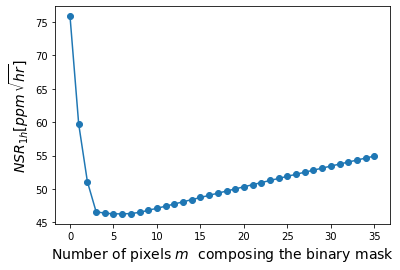

In [34]:
plt.plot(NSR1h, 'o-')
plt.xlabel('Number of pixels $m$  composing the binary mask', fontsize=14)
plt.ylabel('$ NSR_{1h}[ppm \, \sqrt{hr}] $', fontsize = 14)
plt.savefig('contaminat_m12.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

# -------------------------------------------------------------------------------------------------------------
# Statistical Significance
# June 16, 2022.

## Let's calculate now the statistical significance of an Earth-like planet at 1 a.u. from a Sun-like star, according to [Marchiori et al. (2019)](https://www.aanda.org/articles/aa/pdf/2019/07/aa35269-19.pdf)

In [35]:
class eta:
    def __init__(self, td, ntr, delta, spr, nsr):
        self.td = td
        self.ntr = ntr
        self. delta = delta
        self.spr = spr
        self.nsr = nsr

In [36]:
earth = eta(13, 3, 84, 0, 74)

In [51]:
def significance(planet):
    return planet.delta*np.sqrt(planet.td*planet.ntr)*(1-planet.spr)/planet.nsr

In [52]:
print(significance(earth))

7.088916646830615


## That's for an Earth-like planet at 1 a.u. from a Sun-like star, but , what happens with other type of planets at 1 a.u. form a Sun-like star? Let's try to find out 

In [53]:
print((7.1*74)/(84*3))

2.0849206349206346


## Calculating $ SPR_{k}^{crit} $ according to [Marchiori et al. (2019)](https://www.aanda.org/articles/aa/pdf/2019/07/aa35269-19.pdf):

$ SPR^{crit}_{k} = \frac{\eta}{\left(  1 - 10^{-0.4 \delta_{back,k}}  \right)} \frac{NSR_{1h}}{\sqrt{t_{d}n_{tr}}} $

## According to the same paper:

 $ \eta = 7.1 \\ $
 $ \delta_{back, k} = 0.8 mag = 680000 ppm \\ $
 $ NSR = 74 ppm hr^{\frac{1}{2}} \\ $
 $ t_{d} = 4 hr \\ $
 $ n_{tr} = 3 $
 

In [59]:
def spr(e, dback, nsr, t, ntt):
    term1 = e/(1 - 10**(-(0.4*0.68)))
    term2 = nsr/np.sqrt(t*ntt)
    return term1*term2


print(spr(7.1, 680000, 74, 4, 3))

325.8665699077275


# -------------------------------------------------------------------------------------------------------------
## Making the simulations